https://www.geeksforgeeks.org/the-stock-span-problem/


https://tutorialspoint.dev/data-structure/stack-data-structure/the-stock-span-problem
http://python.algorithmexamples.com/web/data_structures/stacks/stock_span_problem.html

# Problem Solving Template for the Stock Span Problem

_To learn how to use this template, check out the course ["Data Structures and Algorithms in Python"](https://jovian.ai/learn/data-structures-and-algorithms-in-python)._




## How to run the code and save your work

The recommended way to run this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. 

This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

#### Saving your work

Before staring the assignment, let's save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later, and continue your work.

In [ ]:
project_name = "Stock_span"
file = 'stock_span.ipynb'

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name, filename=file)

## Problem Statement


> The stock span problem is a financial problem where we have a series of *n daily price quotes* for a stock and we need to calculate span of stock’s price for all n days. The span *Si* of the stock’s price on a given day i is defined as the maximum number of consecutive days just before the given day, for which the price of the stock on the current day is less than or equal to its price on the given day.

> **Implementation.** 
First, we create a stack and an empty list of stock spans, which will contain the output.

Then, always the first stock-span is 1 by default.

> *Calculation of the stock span for a certain day* 

1. Check the stock price that corresponds to the index on top of the stack.
2. Compare it with the stock price at the current day. If it’s greater than the current price, pop this index out of the stack and assign a value of 1. Repeat the same process with the new stack top.
3. When the stock price that corresponds to the index at the top of​ the stack​ is smaller than the stock price of the current day, calculate the stock-span by subtracting the index at the top of the stack from the index of the current day.
4. Once we have calculated the stock span for a certain day, we add this to the corresponding index in the list of stock spans. 
5. Push the index of this element onto the stack.


> For example, if an array of 7 days prices is given as `[100, 80, 60, 70, 60, 75, 85]`, then the span values for corresponding 7 days are `[1, 1, 1, 2, 1, 4, 6]`. Our list of spans is ready.


Source: https://practice.geeksforgeeks.org/problems/stock-span-problem-1587115621/1

## The Method

Here's the systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

This approach is explained in detail in [Lesson 1](https://jovian.ai/learn/data-structures-and-algorithms-in-python/lesson/lesson-1-binary-search-linked-lists-and-complexity) of the course. Let's apply this approach step-by-step.

## Solution


### 1. State the problem clearly. Identify the input & output formats.

While this problem is stated clearly enough, it's always useful to try and express in your own words, in a way that makes it most clear for you. 


**Problem**

> The stock span problem is a financial problem where we have a series of *n daily price quotes* for a stock and we need to calculate span of stock’s price for all n days. The span *Si* of the stock’s price on a given day i is defined as the maximum number of consecutive days just before the given day, for which the price of the stock on the current day is less than or equal to its price on the given day.
<br/>


**Input**

1. GOOG = `[1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043]`
2. MSFT = `[177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230]`
3. AAPL = `[72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119]`
4. TSLA = `[156, 167, 215, 286, 498, 429, 388, 567, 705, 793, 675, 654]`
5. AMZN = `[2474, 2442, 2758, 3164, 3450, 3148, 3036, 3168, 3256, 3206, 3092, 3074]`
6. NVDA = `[291, 354, 379, 424, 534, 540, 501, 535, 522, 519, 548, 513]`
7. INTC = `[58, 61, 58, 46, 49, 51, 43, 47, 49, 55, 60, 63]`
8. AMD = `[79, 84, 85, 91, 92, 75, 81, 90, 77, 52, 53, 52]` 

**Output**

1. GOOG = `[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]`
2. MSFT = `[1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]`
3. AAPL = `[1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]`
4. TSLA = `[1, 2, 3, 4, 5, 1, 1, 8, 9, 10, 1, 1]`
5. AMZN = `[1, 1, 3, 4, 5, 1, 1, 3, 4, 1, 1, 1]`
6. NVDA = `[1, 2, 3, 4, 5, 6, 1, 2, 1, 1, 11, 1]`
7. INTC = `[1, 2, 1, 1, 2, 3, 1, 2, 3, 7, 9, 12]`
8. AMD = `[1, 2, 1, 4, 5, 1, 1, 8, 1, 1, 1, 1]` 


<br/>

Based on the above, we can now create a signature of our function:

In [ ]:
GOOG = [2043,2036,1835,1751,1760,1621,1469,1634,1482,1413,1428,1348]
MSFT = [230,231,231,221,213,201,209,223,203,202,181,177]
AAPL = [119,121,131,132,118,108,115,128,105,90,78,72]
TSLA = [654,675,793,705,567,388,429,498,286,215,167,156]
AMZN = [3074,3092,3206,3256,3168,3036,3148,3450,3164,2758,2442,2474]
NVDA = [513,548,519,522,535,501,540,534,424,379,354,291]
INTC = [63,60,55,49,47,43,51,49,46,58,61,58]
AMD = [79,84,85,91,92,75,81,90,77,52,53,52]

In [ ]:
# Reversing the list, because it was copy in desceding time order
GOOG = GOOG[::-1]
MSFT = MSFT[::-1]
AAPL = AAPL[::-1]
TSLA = TSLA[::-1]
AMZN = AMZN[::-1]
NVDA = NVDA[::-1]
INTC = INTC[::-1]
AMD = AMD[::-1]

# update lists
print('Updated List ascending order: \n','Google:',GOOG,'\n','Microsoft:',MSFT,'\n',
        'Apple:',AAPL,'\n','Tesla:',TSLA,'\n','Amazon:',AMZN,'\n',
        'Nvidia:',NVDA,'\n','Intel:',INTC,'\n','AMD:',AMD )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5))
index = np.arange(len(GOOG))
ax1.bar(np.arange(len(GOOG)),GOOG, color='pink')
ax1.set_title('Google prices')
ax2.bar(np.arange(len(MSFT)),MSFT, color='blue')
ax2.set_title('Microsoft prices')
ax3.bar(np.arange(len(AAPL)),AAPL,color='gray')
ax3.set_title('Apple prices')
f, (ax4,ax5,ax6) = plt.subplots(1, 3, figsize=(20, 5))
ax4.bar(np.arange(len(TSLA)),TSLA, color='red')
ax4.set_title('Tesla prices')
ax5.bar(np.arange(len(AMZN)),AMZN,color='orange')
ax5.set_title('Amazon prices')
ax6.bar(np.arange(len(NVDA)),NVDA,color='green')
ax6.set_title('Nvidia prices')
f, (ax7,ax8,ax9) = plt.subplots(1, 3, figsize=(20, 5))
ax7.bar(np.arange(len(INTC)),INTC, color='cyan')
ax7.set_title('Intel prices')
ax8.bar(np.arange(len(AMD)),AMD,color='black')
ax8.set_title('AMD prices')

In [ ]:
# Create a function signature here. The body of the function can contain a single statement: pass
def span_brute(price): 
    pass      

Save and upload your work before continuing.

In [ ]:
jovian.commit()

### 2. Come up with some example inputs & outputs. Try to cover all edge cases.

Our function should be able to handle any set of valid inputs we pass into it. Here's a list of some possible variations we might encounter:

1. test1 = {'input': {'price': `[1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043]`},
    
            'output': `[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]`}
   
2. test2 = {'input': {'price': `[177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230]`},
    
            'output': `[1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]`}

3. test3 = {'input': {'price': `[72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119]`},
    
            'output': `[1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]`}

4. test4 = {'input': {'price': `[156, 167, 215, 286, 498, 429, 388, 567, 705, 793, 675, 654]`},
    
            'output': `[1, 2, 3, 4, 5, 1, 1, 8, 9, 10, 1, 1]`}

5. test5 = {'input': {'price': `[2474, 2442, 2758, 3164, 3450, 3148, 3036, 3168, 3256, 3206, 3092, 3074]`},
    
            'output': `[1, 1, 3, 4, 5, 1, 1, 3, 4, 1, 1, 1]`}

6. test6 = {'input': {'price': `[291, 354, 379, 424, 534, 540, 501, 535, 522, 519, 548, 513]`},
    
            'output': `[1, 2, 3, 4, 5, 6, 1, 2, 1, 1, 11, 1]`}

7. test7 = {'input': {'price': `[58, 61, 58, 46, 49, 51, 43, 47, 49, 55, 60, 63]`},
    
            'output': `[1, 2, 1, 1, 2, 3, 1, 2, 3, 7, 9, 12]`}

8. test8 = {'input': {'price': `[52, 53, 52, 77, 90, 81, 75, 92, 91, 85, 84, 79]`},
    
            'output': `[1, 2, 1, 4, 5, 1, 1, 8, 1, 1, 1, 1]`}


We'll express our test cases as dictionaries, to test them easily. Each dictionary will contain 2 keys: `input` (a dictionary itself containing one key for each argument to the function and `output` (the expected result from the function). 

In [ ]:
test0 = {
    'input': {'price': [10, -10 ,0, 5, 90, 120, 80, 100, 80, 60, 70, 60, 75, 85]},
    'output': [1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]
    }

In [ ]:
test1 = {
    'input': {'price': [1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043]},
    'output': [1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]}
test2 = {
    'input': {'price': [177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230]},
    'output': [1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]}
test3 = {
    'input': {'price': [72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119]},
    'output': [1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]}
test4 = {
    'input': {'price': [156, 167, 215, 286, 498, 429, 388, 567, 705, 793, 675, 654]},
    'output': [1, 2, 3, 4, 5, 1, 1, 8, 9, 10, 1, 1]}
test5 = {
    'input': {'price': [2474, 2442, 2758, 3164, 3450, 3148, 3036, 3168, 3256, 3206, 3092, 3074]},
    'output': [1, 1, 3, 4, 5, 1, 1, 3, 4, 1, 1, 1]}
test6 = {
    'input': {'price': [291, 354, 379, 424, 534, 540, 501, 535, 522, 519, 548, 513]},
    'output': [1, 2, 3, 4, 5, 6, 1, 2, 1, 1, 11, 1]}
test7 = {
    'input': {'price': [58, 61, 58, 46, 49, 51, 43, 47, 49, 55, 60, 63]},
    'output': [1, 2, 1, 1, 2, 3, 1, 2, 3, 7, 9, 12]}
test8 = {
    'input': {'price': [52, 53, 52, 77, 90, 81, 75, 92, 91, 85, 84, 79]},
    'output': [1, 2, 1, 4, 5, 1, 1, 8, 1, 1, 1, 1]}

We can test the function by passing the input to it directly or by using the `evaluate_test_case` function from `jovian`.

Create one test case for each of the scenarios listed above. We'll store our test cases in an array called `tests`.

In [ ]:
tests = []

In [ ]:
tests.append(test0)

In [ ]:
# add more test cases
tests.append(test1)
tests.append(test2)
tests.append(test3)
tests.append(test4)
tests.append(test5)
tests.append(test6)
tests.append(test7)
tests.append(test8)

In [ ]:
tests

Evaluate your function against all the test cases together using the `evaluate_test_cases` (plural) function from `jovian`.

Verify that all the test cases were evaluated. We expect them all to fail, since we haven't implemented the function yet.

Let's save our work before continuing.

In [ ]:
jovian.commit()

### 3. Come up with a correct solution for the problem. State it in plain English.

Our first goal should always be to come up with a _correct_ solution to the problem, which may not necessarily be the most _efficient_ solution. Come with a correct solution and explain it in simple words below:

> **Implementation.** 
First, we create a stack and an empty list of stock spans, which will contain the output.

Then, always the first stock-span is 1 by default.

> **Calculation of the stock span for a certain day**

1. Check the stock price that corresponds to the index on top of the stack.
2. Compare it with the stock price at the current day. If it’s greater than the current price, pop this index out of the stack and assign a value of 1. Repeat the same process with the new stack top.
3. When the stock price that corresponds to the index at the top of​ the stack​ is smaller than the stock price of the current day, calculate the stock-span by subtracting the index at the top of the stack from the index of the current day.
4. Once we have calculated the stock span for a certain day, we add this to the corresponding index in the list of stock spans. 
5. Push the index of this element onto the stack.


> For example, if an array of 7 days prices is given as `[100, 80, 60, 70, 60, 75, 85]`, then the span values for corresponding 7 days are `[1, 1, 1, 2, 1, 4, 6]`. Our list of spans is ready.


Let's save and upload our work before continuing.




In [ ]:
jovian.commit()

###  4. Implement the solution and test it using example inputs. Fix bugs, if any.

Below is the implementation of the Stock Span algorithm.

In [15]:
def span_brute(price): 
    # Span value of first day is always 1 
    n = len(price)
    S = [None] * n
    S[0] = 1
    # it has 3 arguments:
    # price: the list of stock prices,
    # n: the lenght of the list pf prices and,
    # S: is the output and empty list of the stock prices with same size
    # Calculate span value of remaining days by linearly  
    # checking previous days 
    for i in range(0, len(price)): 
        S[i] = 1   # Initialize span value 
        # Traverse left while the next element on left is 
        # smaller than price[i] 
        j = i - 1
        while (j >= 0) and (price[i] >= price[j]):
            S[i] += 1
            j -= 1
    return S

In [16]:
from jovian.pythondsa import evaluate_test_case

In [17]:
evaluate_test_case(span_brute, test0)


Input:
{'price': [10, -10, 0, 5, 90, 120, 80, 100, 80, 60, 70, 60, 75, 85]}

Expected Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]


Actual Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]

Execution Time:
0.026 ms

Test Result:
PASSED



([1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6], True, 0.026)

In [20]:
from jovian.pythondsa import evaluate_test_cases

In [88]:
res2= evaluate_test_cases(span_brute, tests)


TEST CASE #0

Input:
{'price': [10, -10, 0, 5, 90, 120, 80, 100, 80, 60, 70, 60, 75, 85]}

Expected Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]


Actual Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]

Execution Time:
0.072 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'price': [1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043]}

Expected Output:
[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]


Actual Output:
[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]

Execution Time:
0.037 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'price': [177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230]}

Expected Output:
[1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]


Actual Output:
[1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]

Execution Time:
0.028 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'price': [72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119]}

Expected Output:
[1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]


Actual Output:
[1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]

Execution Time:

### 5. Analyze the algorithm's complexity and identify inefficiencies, if any.

In [18]:
n = 500
y1 = 15*n+1 
y2 = 25*n+10 

print(y1,y2)

y3 = 15*n**2+1 
y4 = 25*n**2+10 

print(y3,y4)

7501 12510
3750001 6250010


One of the drawbacks of the previous algorithm is its time Complexity, which is *O(n^2)*.

Let’s examine at the previous solution. So, the ___Brute force solution___ would be: for each day, says current day, scan all days prior to it, and increment the span until the price of the stock is higher than the current day. For the simple implementation, the time complexity is O(n2) where n is the number of days.

O(n) relates to the upper-bound run-time for the algorithm to run. In this case, O(n) means for n-elements there will need to be all n-elements considered for the algorithms computation to complete, or linear. Also, consider equations such as the following, where n is equal to 500:

~~~
Equation 1
y1 = 15n+1 = 7,501
y2 = 25n+10 = 12,510
~~~

These both are O(n) complexity because as the number of elements grow, the result grows larger in _y2_. We neglect the constants because the equation will grow larger and fast due to the value of **n**, rather than due to the constant values which never change. Whereas, with the following equation (including an O(n²) case:

~~~
Equation 2
y1 = 15n²+1 = 3,750,001
y2 = 25n²+10 = 6,250,010
~~~

The complexity is going to be O(n^2) due to the _15n² and 25n²_ being the largest growing elements contributing to te extent growing in the results. In our example, the brute force algorithm takes as long as O(n^2) (worst case) this is common in analysis of sorting algorithms or searching algorithms.

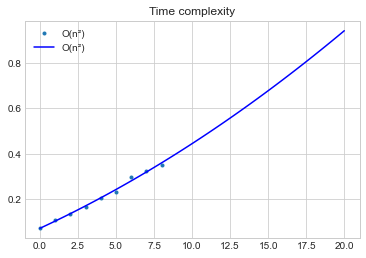

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

time0 = []*len(res2)

for p in res2:
   time0.append(p[2])

time1 = np.cumsum(time0)
    
N = np.arange(0,9,1)

ax = plt.axes()
z = np.polyfit(N,time1,2)
p = np.poly1d(z)
xp = np.linspace(0, 20)

plt.plot(N, time1, '.', xp, p(xp),'-b', label='O(n²)')
# plt.plot(N, time_0, '-g', label='O(n)')
plt.title("Time complexity")
plt.legend();

In [ ]:
jovian.commit()

### 6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

In [ ]:
jovian.commit()

### 7. Come up with a correct solution for the problem. State it in plain English.


In some cases, we want and it is possible to write programs with algorithms that are efficient and faster for optimization reasons, especially when we want a quicker program for faster solutions or quicker run times.

For the most efficient solution for the stock span problem is **O(n)** because it uses a for loop to iterate over the n-elements.


#### **Stock Span problem: Efficient solution**

If we observed the brute force algorithm, it was evident that we were interested in a day with a stock price that is greater than the current day’s stock price. So, we needed to check the last price which was greater than the current day’s price.

So the solution is found with a [stack](https://www.tutorialspoint.com/data_structures_algorithms/stack_algorithm.htm), which is the data structure which allows us to maintain the last price and see it first. The steady solution shows that the elements should be in the increasing order of price. The element at the top should be the maximum price seen until the current day.

> * So we go through each day’s stock price, check if the current price on top of the stack is less than the current day’s price. 
    - If **YES**, pop out until price on top of the stack is greater than the current day’s price, the stock span of the current day is the difference between the day of price on top of the stack and current day.
    - **Storing the index** of the last greatest stock price would make things easier as compared to storing actual stock price on the stack. Hence, store the index _i_ on the stack and price[i] will give us the price of the stock on the ith day.

#### **Algorithm**

We can calculate stock span values in an O(n) time.

We initialize span of day 1 (i=0) as 1 and put on to the stack.

> * For i=1 to n, do following:
    - While price[max(stack)] < price[i] and stack is not empty, stack.pop(i) removes the price[i] from the stack.
> * If price[stack.top(i)] > price[i], span = (i – max(stack))
    - Push current day index i on to stack.

Let’s take the initial example. Let’s say prices are given on certain days are as following: `[100, 80, 60, 70, 60, 75, 85]`.

Following the above algorithm, we will put span[0] = 1, and the stack will be [0].

> * On day 2, stock price is 80. Stock price on day[1] at the top of stack is 100, which is greater than 80, we have span[1] = 1-0 = 1. 
    On day 3, stock price is 60. We will pop [i] from the stack till price[max(stack)] < price[i], so span[2] = 2 – 0 = 2. 
> * On day 4, stock price is 70, price[4] > price[3], so span[3] = 4 - 2 = 2. 
    On day 5, stock price is 60, now price[5] are less than 70, span[4] = 1 - 0 = 1. 
> * On day 6, stock price is 75, now we pop out 2, 3 and 4 from stack as prices are less than 75. span[5] = 6 - 2 = 4.
> * Finally on day 7, the stock price is 85, now we pop out from 1 to 5 as price[6] and price[2] are less than 85. Now stack is empty, at this point, span[6] = 7 - 1 = 6.

In [ ]:
jovian.commit()

### 8. Implement the solution and test it using example inputs. Fix bugs, if any.

In [84]:
# A stack based efficient method to calculate Stack-Span
def calculateSpan(price):
    n = len(price)
    S = [0 for i in range(n)] 
    # Create a stack and push index of fist element to it
    st = []
    # Stack value of first element is always 0
    st.append(0)
    # Span value of first element is always 1
    S[0] = 1
 
    # Calculate span values for rest of the elements
    for i in range(1, n):
        # Pop elements from stack while stack is not empty and top of stack is smaller than price[i]
        while(len(st) > 0 and price[st[-1]] <= price[i]):
            st.pop()
        # If stack becomes empty, then price[i] is greater than all elements on left of it, i.e. price[0],
        S[i] = i + 1 if len(st) <= 0 else (i - st[-1])
        st.append(i)
    
    return S

In [85]:
evaluate_test_case(span_brute, test0)


Input:
{'price': [10, -10, 0, 5, 90, 120, 80, 100, 80, 60, 70, 60, 75, 85]}

Expected Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]


Actual Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]

Execution Time:
0.025 ms

Test Result:
PASSED



([1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6], True, 0.025)

In [94]:
res4 = evaluate_test_cases(span_brute, tests)


TEST CASE #0

Input:
{'price': [10, -10, 0, 5, 90, 120, 80, 100, 80, 60, 70, 60, 75, 85]}

Expected Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]


Actual Output:
[1, 1, 2, 3, 5, 6, 1, 2, 1, 1, 2, 1, 4, 6]

Execution Time:
0.068 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'price': [1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043]}

Expected Output:
[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]


Actual Output:
[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]

Execution Time:
0.051 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'price': [177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230]}

Expected Output:
[1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]


Actual Output:
[1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]

Execution Time:
0.034 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'price': [72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119]}

Expected Output:
[1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]


Actual Output:
[1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]

Execution Time:

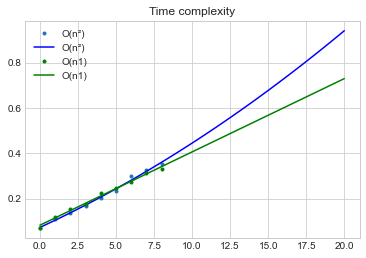

In [106]:
time0 = []*len(res2)

for p in res2:
   time0.append(p[2])
time1 = np.cumsum(time0)
    
N = np.arange(0,9,1)

ax = plt.axes()
z1 = np.polyfit(N,time1,2)
p1 = np.poly1d(z1)
xp = np.linspace(0, 20)

## GRAPH for O(N)
time2 = []*len(res4)

for p in res4:
   time2.append(p[2])
time3 = np.cumsum(time2)
    
z2 = np.polyfit(N,time3,1)
p2 = np.poly1d(z2)
# xp = np.linspace(0, 20)

plt.plot(N, time1, '.', xp, p1(xp),'-b', label='O(n²)')
plt.plot(N, time3, '.g', xp, p2(xp),'-g', label='O(n1)')
# plt.plot(N, time_0, '-g', label='O(n)')
plt.title("Time complexity")
plt.legend();

### 9. Analyze the algorithm's complexity and identify inefficiencies, if any.

**Alogrithm implementation**

The optimal time complexity of the stock span algorithm is O(n) along with a space-complexity of O(n).

> A Linear Time Complexity Method 
We see that S[i] on day i can be easily computed if we know the closest day preceding i, such that the price is greater than on that day than the price on the day i. If such a day exists, let’s call it h(i), otherwise, we define h(i) = -1. 
The span is now computed as S[i] = i – h(i). See the following diagram.

If you found the problem on an external platform, you can make a submission to test your solution.

Share your approach and start a discussion on the Jovian forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78

In [ ]:
jovian.commit()